## US Oil and Gas Production

### By Jay Vachhani
Analysing the [Kaggle Dataset](https://www.kaggle.com/djzurawski/us-oil-and-gas-production-june-2008-to-june-2018) with information about Oil and Gas production in the US from June 2008 to June 2018

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib

Let's load the Gas production:
df means dataframe

In [2]:
file = "U.S._natural_gas_production.csv"
gas_df = pd.read_csv(file, decimal=",")
gas_df.head(3)

,Month,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
0,2008-06-01,70626,8875,1196,1024,2995,7339,6839,670,1198,540,21446,5241,224,243,3975,323,3989,3576,932
1,2008-07-01,71137,8375,1256,1034,3150,7468,6940,674,1200,512,21547,5256,220,243,4179,324,4008,3834,919
2,2008-08-01,70760,8739,1313,1033,3092,6868,6835,678,1277,529,21777,4896,220,249,4092,327,3896,4056,881


In [3]:
gas_df.shape

(121, 20)

In [4]:
gas_df.columns

Index(['Month', 'U.S.', 'Alaska', 'Arkansas', 'Kansas', 'Other States',
       'Federal Offshore--Gulf of Mexico', 'Wyoming', 'West Virginia', 'Utah',
       'Pennsylvania', 'Texas', 'Oklahoma', 'Ohio', 'North Dakota',
       'New Mexico', 'Montana', 'Louisiana', 'Colorado', 'California'],
      dtype='object')

In [5]:
gas_df.dtypes[0:2]

Month    object
U.S.      int64
dtype: object

In [6]:
gas_df['Month'] = pd.to_datetime(gas_df['Month'], format='%Y-%m-%d')
gas_df.head(3)

,Month,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
0,2008-06-01,70626,8875,1196,1024,2995,7339,6839,670,1198,540,21446,5241,224,243,3975,323,3989,3576,932
1,2008-07-01,71137,8375,1256,1034,3150,7468,6940,674,1200,512,21547,5256,220,243,4179,324,4008,3834,919
2,2008-08-01,70760,8739,1313,1033,3092,6868,6835,678,1277,529,21777,4896,220,249,4092,327,3896,4056,881


In [7]:
gas_df['Month'] = pd.to_datetime(gas_df['Month'], format='%Y-%m-%d')
gas_df.head(3)
gas_df.dtypes[0:2]

Month    datetime64[ns]
U.S.              int64
dtype: object

In [10]:
gas_df['Month'].dt.year.head()

0    2008
1    2008
2    2008
3    2008
4    2008
Name: Month, dtype: int64

In [9]:
gas_df['Month'].dt.month.tail()

116    2
117    3
118    4
119    5
120    6
Name: Month, dtype: int64

---

## Yearly Gas production

How much gas has been produced yearly globally and in every state of the US?

In [14]:
yearly_gas_df = gas_df.groupby(gas_df['Month'].dt.year).sum()
yearly_gas_df

,U.S.,Alaska,Arkansas,Kansas,Other States,Federal Offshore--Gulf of Mexico,Wyoming,West Virginia,Utah,Pennsylvania,Texas,Oklahoma,Ohio,North Dakota,New Mexico,Montana,Louisiana,Colorado,California
Month,,,,,,,,,,,,,,,,,,,
2008,489473,64732,9395,7229,21678,39112,48393,4709,8726,3759,151483,36206,1617,1773,28518,2262,26289,27351,6240
2009,856876,108986,22353,11689,36078,80346,83413,8692,14782,9009,251694,62535,2919,3040,46867,3463,51221,49716,10071
2010,881622,105219,30475,10708,37542,74309,82687,8718,14361,18771,249632,60074,2568,3741,44101,3068,72873,52259,10521
2011,936163,104154,35384,10191,38187,60213,78095,12948,15170,43014,260747,62075,2592,5155,42315,2615,99905,54215,9181
2012,968632,103856,37571,9714,37045,50102,72988,17694,16079,73950,266989,66337,2772,8473,41846,2197,96895,56037,8092
2013,970617,105776,37466,9613,22657,43647,67338,24363,15482,107076,272844,65524,5442,11362,41010,2078,77873,52769,8296
2014,1032439,104298,36917,9415,20761,41937,65709,35055,14946,139932,284598,76643,16803,15214,41631,1947,64746,54021,7861
2015,1082158,104447,33221,9349,20102,42979,65615,43236,13717,158236,289330,82166,33069,19211,42638,1916,59621,55521,7786
2016,1070085,105900,26999,7984,18722,39990,60613,45077,11958,174225,266713,80932,47199,19964,42120,1710,57459,55791,6723


This data is now grouped by the year, we can now plot a bar chart to visualise the trends of the data

Text(0, 0.5, 'Total Production')

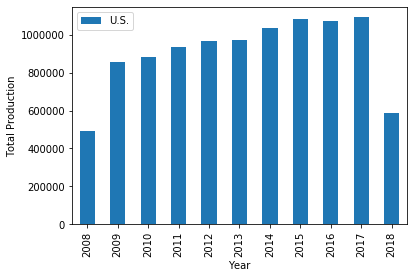

In [16]:
chart = yearly_gas_df.filter(items=["U.S."]).plot(kind="bar")
chart.set_xlabel("Year")
chart.set_ylabel("Total Production")